In [1]:
# Import data

# Merge dfs

# Create a bubble chart (avg fare x number of drivers for each city type)

# Determine mean, median, and mode (rides for each city type, avg fares for each city type, drivers for each city type)

# Create a pie chart for each city type to show (% total fares, % total rides, % drivers)

In [2]:
# matplotlib inline magic command
%matplotlib inline

# Dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [4]:
# Read city data into df
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
# Read ride data into df
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [6]:
# Get columns and rows that are not null
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [7]:
# get columns and rows that  are null
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [8]:
# Get data types
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [9]:
# Get unique values of city type
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [10]:
# Number of data points from each city type
urban_points = sum(city_data_df["type"]=="Urban")
suburban_points = sum(city_data_df["type"]=="Suburban")
rural_points = sum(city_data_df["type"]=="Rural")

print(urban_points)
print(suburban_points)
print(rural_points)

66
36
18


In [11]:
# Inspect ride_data_df
print(ride_data_df.count())
print(ride_data_df.isnull().sum())
print(ride_data_df.dtypes)

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64
city       0
date       0
fare       0
ride_id    0
dtype: int64
city        object
date        object
fare       float64
ride_id      int64
dtype: object


In [12]:
# Merge data
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city"])

pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [13]:
# Create Urban city DataFrame from pyber_data_df
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]


# Create Urban city DataFrame from pyber_data_df
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]


# Create Urban city DataFrame from pyber_data_df
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]


In [14]:
# Get the number rides for each city by city type 
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]

suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]

rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]


In [15]:
# Get the average fare for each city by city type
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]

suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]

rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]


In [16]:
# Get average number of drivers for each city by city type
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]

suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]

rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]


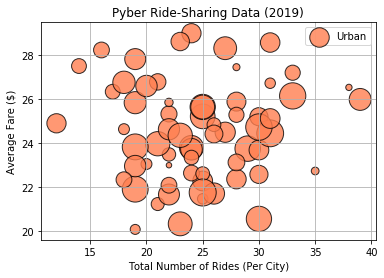

In [17]:
# Build scatter plot for urban cities
plt.scatter(urban_ride_count, urban_avg_fare, 
            s=10*urban_driver_count, 
            c="coral", edgecolor="black", linewidths=1, alpha=0.8, label="Urban")

# Add title and axis labels
plt.title("Pyber Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Add Grid and Legend
plt.grid(True)
plt.legend()

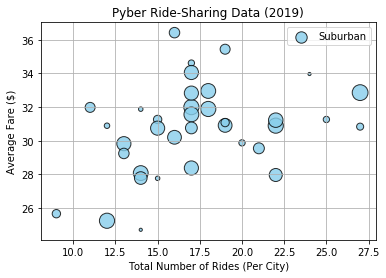

In [18]:
# Build scatter plot for urban cities
plt.scatter(suburban_ride_count, suburban_avg_fare, 
            s=10*suburban_driver_count, 
            c="skyblue", edgecolor="black", linewidths=1, alpha=0.8, label="Suburban")

# Add title and axis labels
plt.title("Pyber Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Add Grid and Legend
plt.grid(True)
plt.legend()

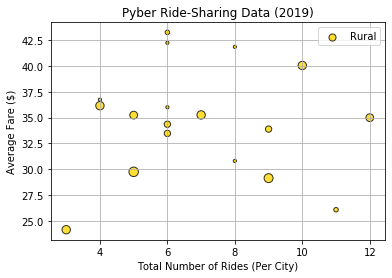

In [19]:
# Build scatter plot for urban cities
plt.scatter(rural_ride_count, rural_avg_fare, 
            s=10*rural_driver_count, 
            c="gold", edgecolor="black", linewidths=1, alpha=0.8, label="Rural")

# Add title and axis labels
plt.title("Pyber Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

# Add Grid and Legend
plt.grid(True)
plt.legend()

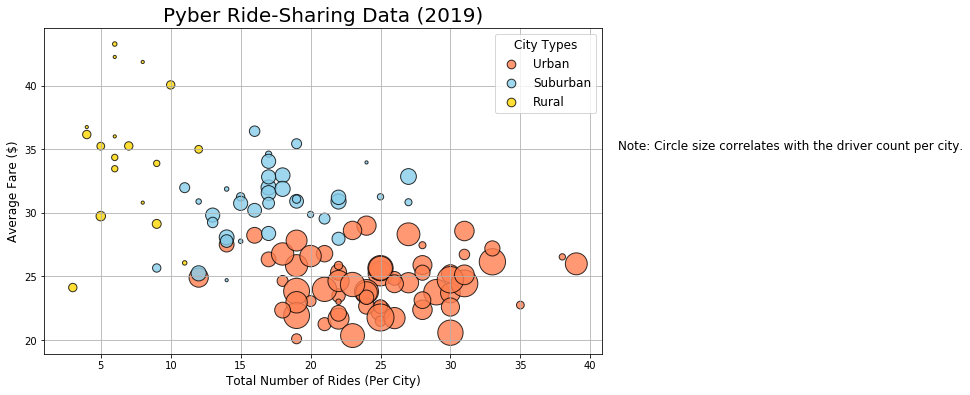

In [20]:
# Create a single plot with all data
plt.subplots(figsize=(10, 6))
plt.scatter(urban_ride_count, urban_avg_fare, 
            s=10*urban_driver_count, 
            c="coral", edgecolor="black", linewidths=1, alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count, suburban_avg_fare, 
            s=10*suburban_driver_count, 
            c="skyblue", edgecolor="black", linewidths=1, alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, rural_avg_fare, 
            s=10*rural_driver_count, 
            c="gold", edgecolor="black", linewidths=1, alpha=0.8, label="Rural")

# Add title and axis labels
plt.title("Pyber Ride-Sharing Data (2019)", fontsize=20)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.grid(True)

# Create a legend
legend = plt.legend(fontsize="12", mode="Expanded", scatterpoints=1, loc="best", title="City Types")
legend.legendHandles[0]._sizes = [75]
legend.legendHandles[1]._sizes = [75]
legend.legendHandles[2]._sizes = [75]
legend.get_title().set_fontsize(12)

# Add note about circle sizes
t1 = "Note: Circle size correlates with the driver count per city."

plt.text(42, 35, t1, fontsize="12", wrap=True)

# Save the figure
plt.savefig("analysis/Fig1.png")

# Show plot
plt.show()

In [21]:
# Get summary statistics
print(urban_cities_df.describe())

print(suburban_cities_df.describe())

print(rural_cities_df.describe())

              fare       ride_id  driver_count
count  1625.000000  1.625000e+03   1625.000000
mean     24.525772  4.873485e+12     36.678154
std      11.738649  2.907440e+12     20.075545
min       4.050000  1.458810e+10      3.000000
25%      14.550000  2.400244e+12     22.000000
50%      24.640000  4.711188e+12     37.000000
75%      34.580000  7.451579e+12     52.000000
max      44.970000  9.991538e+12     73.000000
             fare       ride_id  driver_count
count  625.000000  6.250000e+02    625.000000
mean    30.970128  4.971015e+12     13.712000
std     10.677508  2.912410e+12      8.042372
min     12.050000  3.218337e+08      1.000000
25%     21.970000  2.364253e+12      5.000000
50%     30.750000  5.053221e+12     16.000000
75%     39.830000  7.551674e+12     21.000000
max     49.960000  9.917744e+12     25.000000
             fare       ride_id  driver_count
count  125.000000  1.250000e+02    125.000000
mean    34.623440  4.647746e+12      4.296000
std     14.558046  2.8878

In [22]:
print(urban_ride_count.describe())

print(suburban_ride_count.describe())

print(rural_ride_count.describe())

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64
count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64
count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64


In [23]:
# Calculate the mean ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [24]:
# Calculate the median ride count for each city type.
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [25]:
# Calculate the mode for ride count for each city type.
urban_ride_count.mode(), suburban_ride_count.mode(), rural_ride_count.mode()

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [26]:
# Import NumPy and the stats moduel from SciPy
import numpy as np
import scipy.stats as sts

In [27]:
# Calculate the masures of central tendency for the ride count for urban cities
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the rid counts for urban for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban for urban trips is {mode_urban_ride_count}.")

The mean for the rid counts for urban for urban trips is 24.62.
The median for the ride counts for urban for urban trips is 24.0.
The mode for the ride counts for urban for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [28]:
# Calculate the masures of central tendency for the ride count for urban cities
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the rid counts for urban for urban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for urban for urban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for urban for urban trips is {mode_suburban_ride_count}.")

The mean for the rid counts for urban for urban trips is 17.36.
The median for the ride counts for urban for urban trips is 17.0.
The mode for the ride counts for urban for urban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [29]:
# Calculate the masures of central tendency for the ride count for urban cities
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the rid counts for urban for urban trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for urban for urban trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for urban for urban trips is {mode_rural_ride_count}.")

The mean for the rid counts for urban for urban trips is 6.94.
The median for the ride counts for urban for urban trips is 6.0.
The mode for the ride counts for urban for urban trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [30]:
# Get the fares for urban cities
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [31]:
# Calculate the measures of central tendency for the average fare for urban cities
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is ${mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is $ModeResult(mode=array([22.86]), count=array([5])).


In [32]:
# Get the fares for suburban cities
suburban_fares = suburban_cities_df["fare"]

# Calculate the measures of central tendency for the average fare for suburban cities
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for urban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for urban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for urban trips is ${mode_suburban_fares}.")

The mean fare price for urban trips is $30.97.
The median fare price for urban trips is $30.75.
The mode fare price for urban trips is $ModeResult(mode=array([17.99]), count=array([3])).


In [33]:
# Get the fares for rural cities
rural_fares = rural_cities_df["fare"]

# Calculate the measures of central tendency for the average fare for rural cities
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for urban trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for urban trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for urban trips is ${mode_rural_fares}.")

The mean fare price for urban trips is $34.62.
The median fare price for urban trips is $37.05.
The mode fare price for urban trips is $ModeResult(mode=array([37.05]), count=array([2])).


In [34]:
# Get the driver count data from the different city types.
urban_drivers = urban_cities_df['driver_count']

suburban_drivers = suburban_cities_df['driver_count']

rural_drivers = rural_cities_df['driver_count']

In [35]:
# Measure of central tendency for urban cities
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean number of drivers in urban cities is {mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median number of drivers in urban cities is {median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode number of drivers in urban cities is {mode_urban_drivers}.")

The mean number of drivers in urban cities is 36.68.
The median number of drivers in urban cities is 37.00.
The mode number of drivers in urban cities is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [36]:
# Measure of central tendency for suburban cities
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean number of drivers in urban cities is {mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median number of drivers in urban cities is {median_suburban_drivers:.2f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode number of drivers in urban cities is {mode_suburban_drivers}.")

The mean number of drivers in urban cities is 13.71.
The median number of drivers in urban cities is 16.00.
The mode number of drivers in urban cities is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [37]:
# Measure of central tendency for rural cities
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean number of drivers in urban cities is {mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median number of drivers in urban cities is {median_rural_drivers:.2f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode number of drivers in urban cities is {mode_rural_drivers}.")

The mean number of drivers in urban cities is 4.30.
The median number of drivers in urban cities is 4.00.
The mode number of drivers in urban cities is ModeResult(mode=array([1], dtype=int64), count=array([32])).


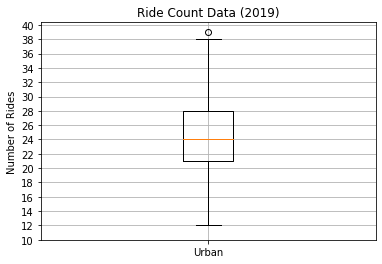

In [38]:
# Create a box-and-whisker plot for the urban cities ride count
x_labels = ["Urban"]

fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

# Add title, axis labels, and a grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10,41, step=2.0))
ax.grid()

plt.show()

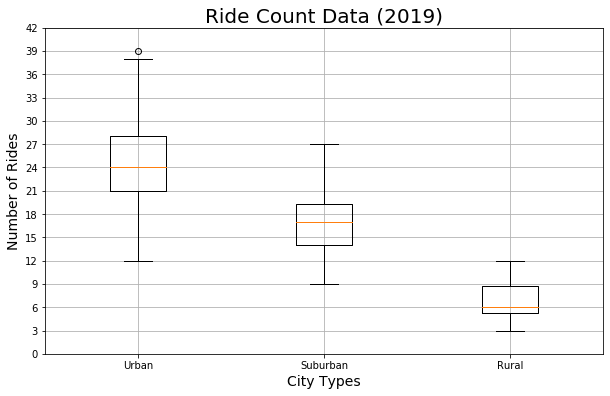

In [39]:
# All ride count box-and-whisker plots in a single graph
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]

fig, ax = plt.subplots(figsize=(10, 6))

# Add title and axis labels
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)

# Create box plot
ax.boxplot(ride_count_data, labels=x_labels)

# Set ticks and add gridlines
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

# Save the figure
plt.savefig("analysis/Fig2.png")

plt.show()

In [40]:
# Get the city that matches the 39 ride counts outlier in the Urban cities
urban_city_outlier = urban_ride_count[urban_ride_count == 39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


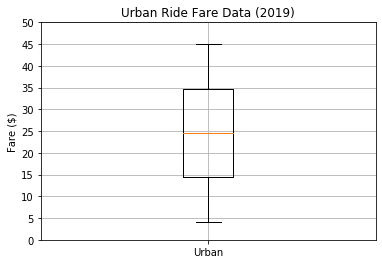

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [45]:
# Urban ride fare data with summary statistics
x_labels = ["Urban"]

fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)

# Add title axis labels and grid
ax.set_title("Urban Ride Fare Data (2019)")
ax.set_ylabel("Fare ($)")
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()

plt.show()
print("Summary Statistics")
urban_fares.describe()

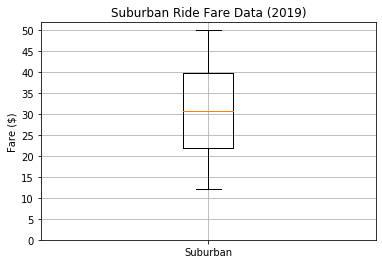

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [47]:
# Suburban ride fare data with summary statistics
x_labels = ["Suburban"]

fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)

# Add title axis labels and grid
ax.set_title("Suburban Ride Fare Data (2019)")
ax.set_ylabel("Fare ($)")
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()

plt.show()
print("Summary Statistics")
suburban_fares.describe()

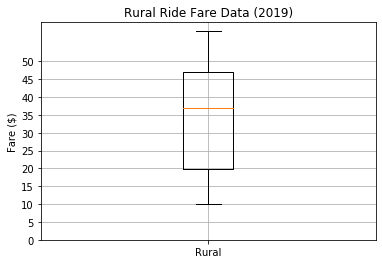

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [48]:
# Rural ride fare data with summary statistics
x_labels = ["Rural"]

fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)

# Add title axis labels and grid
ax.set_title("Rural Ride Fare Data (2019)")
ax.set_ylabel("Fare ($)")
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()

plt.show()
print("Summary Statistics")
rural_fares.describe()

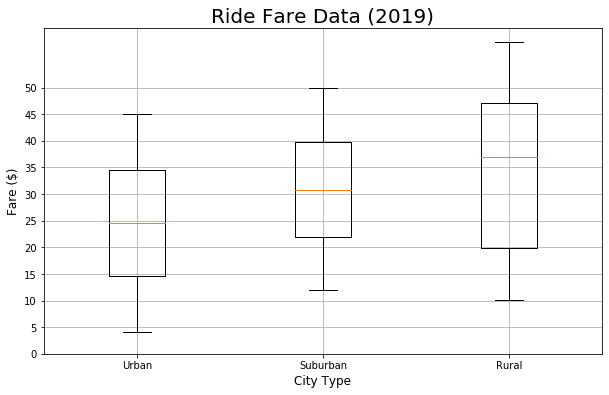

In [60]:
# Create combined box-and-wisker plots for the ride fare data
x_labels = ["Urban", "Suburban", "Rural"]
ride_fare_data = [urban_fares, suburban_fares, rural_fares]

fig, ax = plt.subplots(figsize = (10, 6))
ax.boxplot(ride_fare_data, labels=x_labels)

# Add title axis labels and grid
ax.set_title("Ride Fare Data (2019)", fontsize=20)
ax.set_ylabel("Fare ($)", fontsize=12)
ax.set_xlabel("City Type",fontsize=12)
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()

plt.savefig("analysis/Fig3.png")
plt.show()

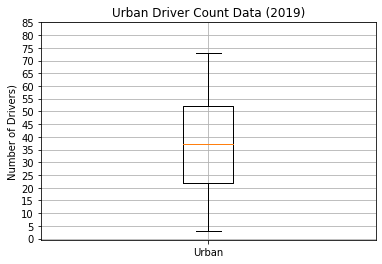

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [55]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Urban Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

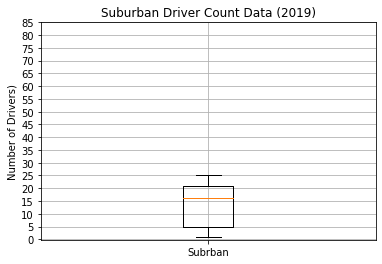

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [57]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Subrban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Suburban Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

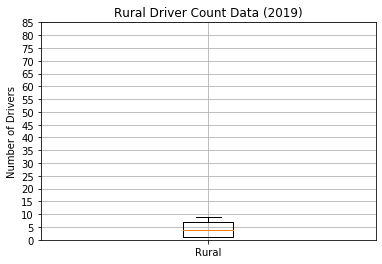

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [61]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Rural Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

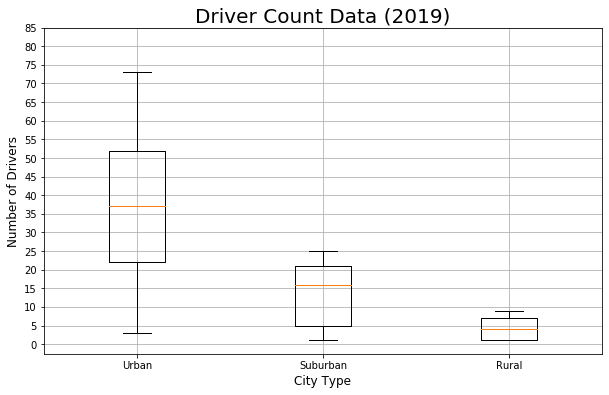

In [62]:
x_labels = ["Urban", "Suburban", "Rural"]
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]

# Create box-and-whisker plot with driver count data from all city types
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(driver_count_data, labels=x_labels)

# Add title axis labels and grid
ax.set_title("Driver Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Drivers", fontsize=12)
ax.set_xlabel("City Type",fontsize=12)
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()

plt.savefig("analysis/Fig4.png")
plt.show()

In [69]:
# Total fares for each city type
sum_total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
print(sum_total_fares)

# Total for all fares
total_fares = pyber_data_df["fare"].sum()
print(total_fares)

# Percentage of total fares for each city type
type_percents = 100 * sum_total_fares / total_fares
print(type_percents)

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64
63538.64
type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64


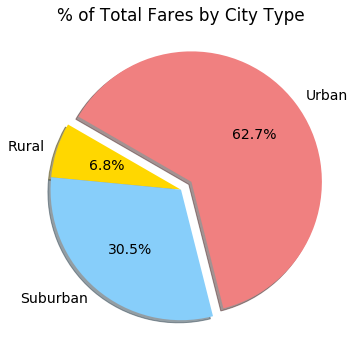

In [75]:
# Import mpl to change plot configurations using rcParams
import matplotlib as mpl

# Build the percentage of fares by city type pie chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0, 0, 0.1], autopct='%1.1f%%', shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Change the default font sizes from 10 to 14
mpl.rcParams['font.size'] = 14

# Save and show figure
plt.savefig("analysis/Fig5.png")
plt.show()

In [79]:
# Calculate the percentage of total rides for each city type
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

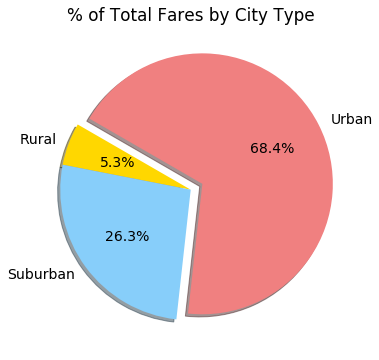

In [81]:
# Build percentage of rides by city type pie chart
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents, labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0, 0, 0.1], autopct='%1.1f%%', shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Change the default font sizes from 10 to 14
mpl.rcParams['font.size'] = 14

# Save and show figure
plt.savefig("analysis/Fig6.png")
plt.show()